<a href="https://colab.research.google.com/github/gabrielcdo/Pythorch/blob/main/07_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1) Design model (input , output , size , forward pass)
# 2) Construct loss and optmizer 
# 3) Training loop
#   -forward pass: comput prediction and loss
#   - backward pass: gradients
#   -update weights

In [ ]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt


In [ ]:
# 0 ) Prepare data 

In [ ]:
X_numpy , y_numpy = datasets.make_regression(n_samples=100 , n_features=1,noise=20 , random_state=1)


In [ ]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(X_numpy.astype(np.float32))
y = y.view(y.shape[0],1)




In [ ]:
n_samples , n_features = X.shape

In [ ]:
# 1)model
input_size = n_features
output_size = 1
model = nn.Linear(input_size , output_size)

In [ ]:
# 2) loss and optmizer 
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate )


epoch:10, loss =1.9544
epoch:20, loss =1.4201
epoch:30, loss =1.0327
epoch:40, loss =0.7515
epoch:50, loss =0.5472
epoch:60, loss =0.3986
epoch:70, loss =0.2906
epoch:80, loss =0.2119
epoch:90, loss =0.1546
epoch:100, loss =0.1129


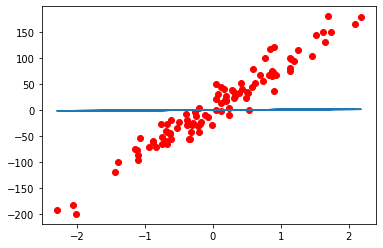

In [ ]:
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted , y)
  #backward pass
  loss.backward()

  # update 
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f'epoch:{epoch+1}, loss ={loss.item():.4f}')

# plot 
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy , 'ro')
plt.plot(X_numpy,predicted)